In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [135]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)#设置最大可见100行

# Average the value from 2017-2019

In [174]:
df17 = pd.read_excel('16-21 cleaned data.xlsx', '2017')
df18 = pd.read_excel('16-21 cleaned data.xlsx', '2018')
df19 = pd.read_excel('16-21 cleaned data.xlsx', '2019')
df20 = pd.read_excel('16-21 cleaned data.xlsx', '2020')
df20

,NO,FIPS,State,County,Population,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,% Fair/Poor,% Smokers,% Obese,% Excessive Drinking,% Physically Inactive,Chlamydia Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,Drug Overdose Mortality Rate,% Insufficient Sleep,% Uninsured,PCP Rate,MHP Rate,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch,Food Environment Index,% With Access,% Food Insecure
0,0,1001,Alabama,Autauga,55869,23.206071,15.973080,19.864325,0.476114,1.174175,2.990925,73.770785,0.803251,51.507992,42.002162,19.839179,19.810766,14.473886,30.6,504.5,13.252958,15.809231,12.7,230.200000,8.384539,38.443332,10.047314,46.76175,28.63842,2.728106,15.9,5.090408,24.740629,12.229996,272.282220,13.630967,11.991125,58233.0,47.492852,6.7,69.130124,15.6
1,1,1003,Alabama,Baldwin,223234,21.302311,20.977987,8.607560,0.780347,1.066146,4.718815,83.207307,0.708458,51.509627,42.279099,16.460675,18.513318,18.736958,24.7,297.2,11.611641,14.755565,10.3,169.300000,12.540451,36.377960,13.168983,70.17640,98.55130,2.725834,13.5,4.385135,22.372271,10.503527,203.660396,12.996651,5.424427,59871.0,40.013016,7.8,73.713549,12.9
2,2,1005,Alabama,Barbour,24686,20.586567,19.691323,47.828729,0.688649,0.469902,4.524832,45.511626,1.890721,47.079316,67.789635,29.841500,25.530768,12.466974,28.0,755.8,18.132105,18.954695,17.5,471.000000,12.604308,40.889589,13.504034,32.15305,12.15264,3.795244,41.0,5.981993,51.008103,7.636349,414.277861,13.710555,10.739667,35972.0,60.769997,5.5,53.166770,21.9
3,3,1007,Alabama,Bibb,22394,20.349201,16.669644,21.072609,0.459945,0.214343,2.781995,74.408324,0.335254,46.731267,68.352607,23.853284,23.084813,15.420603,33.4,613.2,15.065920,17.141793,13.6,235.000000,22.234740,40.110058,10.599051,53.57143,26.79289,3.062752,25.9,5.002608,30.614915,8.482143,89.349126,9.255242,2.601627,47918.0,63.102596,7.6,16.251364,15.1
4,4,1009,Alabama,Blount,57826,22.922215,18.700930,1.507972,0.639851,0.319925,9.653097,86.770657,1.618463,50.762633,89.951502,21.985610,22.954959,15.833284,33.3,303.4,14.812471,17.129570,14.6,90.900000,21.879444,38.847109,14.115997,20.74689,17.29326,2.668667,21.0,4.427838,22.457374,7.780083,482.690611,10.125665,2.880150,52902.0,50.436967,7.9,15.634486,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3137,56037,Wyoming,Sweetwater,42343,25.902747,12.963182,1.185556,1.478403,1.069834,15.993198,79.259854,1.133165,48.496800,10.916313,16.443234,18.508640,19.188001,24.4,307.8,11.540848,12.838169,8.3,60.100000,14.736907,35.437178,11.460988,39.48805,250.33654,3.892075,10.1,4.086863,16.199566,9.988154,300.494146,11.186232,10.845331,80639.0,35.164284,7.5,89.686344,11.7
3138,3138,56039,Wyoming,Teton,23464,17.899761,15.841289,0.617968,0.886464,1.683430,15.146608,80.975111,3.960396,48.252642,46.430920,11.411718,12.884427,23.773860,10.8,382.5,8.885809,10.204923,2.4,65.100000,12.604308,27.067670,13.366362,108.31420,494.37436,2.722311,5.7,3.992274,15.772799,17.330272,236.595908,16.486640,7.409463,98837.0,20.068027,8.3,99.718230,9.5
3139,3139,56041,Wyoming,Uinta,20226,28.438643,14.955997,0.622961,1.443686,0.494413,9.250470,87.298527,0.943048,49.451201,43.095937,16.913370,20.764510,18.407307,25.1,204.9,12.514769,14.180136,10.3,151.164609,12.604308,35.870017,11.838529,49.26351,355.97745,3.907028,9.6,4.167413,10.153483,2.955811,71.006517,10.772226,9.727151,70756.0,34.869646,7.3,84.018373,13.5
3140,3140,56043,Wyoming,Washakie,7805,22.857143,22.165279,0.486867,1.768097,0.819987,14.196028,82.216528,0.251123,49.224856,35.954529,16.650801,19.442539,19.329130,28.7,334.8,11.721750,13.324671,10.7,151.164609,12.604308,32.386639,14.834350,50.72923,397.1

In [175]:
df20 = df20.drop(['NO','FIPS','State','County','% Single-Parent Households'],axis=1)
df20

,Population,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,% Fair/Poor,% Smokers,% Obese,% Excessive Drinking,% Physically Inactive,Chlamydia Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,Drug Overdose Mortality Rate,% Insufficient Sleep,% Uninsured,PCP Rate,MHP Rate,% Unemployed,% Children in Poverty,Income Ratio,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch,Food Environment Index,% With Access,% Food Insecure
0,55869,23.206071,15.973080,19.864325,0.476114,1.174175,2.990925,73.770785,0.803251,51.507992,42.002162,19.839179,19.810766,14.473886,30.6,504.5,13.252958,15.809231,12.7,230.200000,8.384539,38.443332,10.047314,46.76175,28.63842,2.728106,15.9,5.090408,12.229996,272.282220,13.630967,11.991125,58233.0,47.492852,6.7,69.130124,15.6
1,223234,21.302311,20.977987,8.607560,0.780347,1.066146,4.718815,83.207307,0.708458,51.509627,42.279099,16.460675,18.513318,18.736958,24.7,297.2,11.611641,14.755565,10.3,169.300000,12.540451,36.377960,13.168983,70.17640,98.55130,2.725834,13.5,4.385135,10.503527,203.660396,12.996651,5.424427,59871.0,40.013016,7.8,73.713549,12.9
2,24686,20.586567,19.691323,47.828729,0.688649,0.469902,4.524832,45.511626,1.890721,47.079316,67.789635,29.841500,25.530768,12.466974,28.0,755.8,18.132105,18.954695,17.5,471.000000,12.604308,40.889589,13.504034,32.15305,12.15264,3.795244,41.0,5.981993,7.636349,414.277861,13.710555,10.739667,35972.0,60.769997,5.5,53.166770,21.9
3,22394,20.349201,16.669644,21.072609,0.459945,0.214343,2.781995,74.408324,0.335254,46.731267,68.352607,23.853284,23.084813,15.420603,33.4,613.2,15.065920,17.141793,13.6,235.000000,22.234740,40.110058,10.599051,53.57143,26.79289,3.062752,25.9,5.002608,8.482143,89.349126,9.255242,2.601627,47918.0,63.102596,7.6,16.251364,15.1
4,57826,22.922215,18.700930,1.507972,0.639851,0.319925,9.653097,86.770657,1.618463,50.762633,89.951502,21.985610,22.954959,15.833284,33.3,303.4,14.812471,17.129570,14.6,90.900000,21.879444,38.847109,14.115997,20.74689,17.29326,2.668667,21.0,4.427838,7.780083,482.690611,10.125665,2.880150,52902.0,50.436967,7.9,15.634486,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,42343,25.902747,12.963182,1.185556,1.478403,1.069834,15.993198,79.259854,1.133165,48.496800,10.916313,16.443234,18.508640,19.188001,24.4,307.8,11.540848,12.838169,8.3,60.100000,14.736907,35.437178,11.460988,39.48805,250.33654,3.892075,10.1,4.086863,9.988154,300.494146,11.186232,10.845331,80639.0,35.164284,7.5,89.686344,11.7
3138,23464,17.899761,15.841289,0.617968,0.886464,1.683430,15.146608,80.975111,3.960396,48.252642,46.430920,11.411718,12.884427,23.773860,10.8,382.5,8.885809,10.204923,2.4,65.100000,12.604308,27.067670,13.366362,108.31420,494.37436,2.722311,5.7,3.992274,17.330272,236.595908,16.486640,7.409463,98837.0,20.068027,8.3,99.718230,9.5
3139,20226,28.438643,14.955997,0.622961,1.443686,0.494413,9.250470,87.298527,0.943048,49.451201,43.095937,16.913370,20.764510,18.407307,25.1,204.9,12.514769,14.180136,10.3,151.164609,12.604308,35.870017,11.838529,49.26351,355.97745,3.907028,9.6,4.167413,2.955811,71.006517,10.772226,9.727151,70756.0,34.869646,7.3,84.018373,13.5
3140,7805,22.857143,22.165279,0.486867,1.768097,0.819987,14.196028,82.216528,0.251123,49.224856,35.954529,16.650801,19.442539,19.329130,28.7,334.8,11.721750,13.324671,10.7,151.164609,12.604308,32.386639,14.834350,50.72923,397.18129,3.933012,13.9,3.455140,15.218770,78.266105,10.315186,3.621591,55122.0,42.090784,8.0,83.182937,12.6


In [176]:
df20.to_csv('df20.csv')

In [137]:
df=df17+df18+df19
df

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Food Insecure,% Free or Reduced Lunch,% Free or Reduced Lunch.1,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Single-Parent Households,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,County,Drug Overdose Mortality Rate,FIPS,Food Environment Index,Household Income,Income Ratio,MHP Rate,NO,PCP Rate,Population,State,Violent Crime Rate
0,45.362670,71.974035,57.643177,1.480207,3.624798,57.3,37.1,49.026031,56.882987,154.048715,40.2,139.408673,NaN,40.129347,39.685229,5.711509,107.905406,35.991125,152.465774,76.108016,107.3,96.7,126.002162,44.663462,NaN,56.081557,12.829079,26.721686,209.130124,38.571202,1089.4,AutaugaAutaugaAutauga,30.809447,3003,21.5,172168.0,14.234597,52.38087,0,132.04180,166521,AlabamaAlabamaAlabama,810.282220
1,60.043350,65.107911,26.783976,2.372399,3.450343,46.9,32.7,51.958310,53.509134,154.538377,36.6,139.486565,NaN,39.475336,38.480108,9.066966,99.305868,15.424427,170.846779,85.609619,91.0,75.5,126.879099,41.566201,NaN,51.489033,13.015382,34.333404,214.713549,31.905617,1002.8,BaldwinBaldwinBaldwin,47.610487,3009,23.9,170655.0,13.517767,276.32055,3,218.89727,639213,AlabamaAlabamaAlabama,624.660396
2,56.220441,62.767328,143.432635,1.959137,1.454162,133.9,53.6,38.844016,81.591802,141.316752,68.0,203.292302,NaN,46.586252,49.184898,8.584880,116.563167,32.739667,96.776355,48.141252,129.7,82.5,203.389635,44.583333,NaN,65.999985,19.671384,38.242792,160.166770,23.918797,1832.2,BarbourBarbourBarbour,34.719595,3015,16.7,99756.0,17.381410,24.03826,6,112.65809,76116,AlabamaAlabamaAlabama,1157.277861
3,47.873214,61.877679,64.220536,1.237500,0.636607,82.8,44.5,47.570042,59.439724,139.681250,46.3,187.562116,NaN,40.017536,39.626575,5.216071,114.148865,8.601627,151.325000,76.687567,113.6,106.5,205.152607,33.496454,NaN,59.114200,14.971828,32.206253,81.251364,29.181860,943.8,BibbBibbBibb,72.060433,3021,23.0,134938.0,12.868581,40.32143,9,158.52656,67711,AlabamaAlabamaAlabama,325.349126
4,54.036515,69.653527,4.362656,1.853527,0.919848,56.0,45.0,44.230594,63.745293,152.026141,32.7,160.906287,NaN,42.859271,42.523164,18.821024,107.945010,8.880150,183.971231,90.786238,103.8,88.3,269.951502,31.548012,NaN,59.208672,13.011157,39.360759,70.634486,26.246383,462.7,BlountBlountBlount,70.199543,3027,25.4,145878.0,12.630262,34.56017,12,66.40877,173557,AlabamaAlabamaAlabama,1177.690611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,34.011217,79.624710,3.345153,4.544680,2.610429,32.0,24.8,62.871908,44.813082,145.244749,32.7,107.333579,NaN,32.999999,32.109614,32.457952,93.170904,32.845331,175.083250,83.412908,90.8,77.0,32.716313,29.857877,NaN,54.073422,14.836407,39.464995,248.686344,29.936748,660.2,SweetwaterSweetwaterSweetwater,63.120459,168111,23.3,223451.0,12.275923,712.18808,9411,104.75288,130750,WyomingWyomingWyoming,950.494146
3138,43.315277,55.965755,1.732555,2.714172,3.812417,20.7,11.2,65.533577,35.914358,144.903449,29.7,71.206991,NaN,30.322181,29.423727,30.251640,80.551742,21.409463,178.078038,89.104268,39.4,35.6,139.230920,50.967930,NaN,42.546369,9.424772,46.034517,299.718230,53.433548,1138.0,TetonTetonTeton,34.719595,168117,24.7,273350.0,11.675274,1272.58247,9414,358.05416,69537,WyomingWyomingWyoming,704.889352
3139,39.879511,87.389596,2.084763,4.118789,1.572930,35.1,30.3,51.113357,47.537464,148.332479,39.8,111.784558,NaN,35.902582,33.218925,18.347791,93.090485,29.727151,184.236908,89.698394,99.8,76.2,129.295937,35.440108,NaN,53.212675,14.666812,38.664737,248.018373,13.527543,750.5,UintaUintaUinta,70.418195,168123,22.3,195518.0,13.650061,1038.69728

In [138]:
df1 = df.drop(['NO','FIPS','State','County', '% Free or Reduced Lunch.1','% Single-Parent Households'],axis=1)
df1

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Food Insecure,% Free or Reduced Lunch,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,Drug Overdose Mortality Rate,Food Environment Index,Household Income,Income Ratio,MHP Rate,PCP Rate,Population,Violent Crime Rate
0,45.362670,71.974035,57.643177,1.480207,3.624798,57.3,37.1,49.026031,56.882987,154.048715,40.2,139.408673,40.129347,39.685229,5.711509,107.905406,35.991125,152.465774,76.108016,107.3,96.7,126.002162,44.663462,56.081557,12.829079,26.721686,209.130124,38.571202,1089.4,30.809447,21.5,172168.0,14.234597,52.38087,132.04180,166521,810.282220
1,60.043350,65.107911,26.783976,2.372399,3.450343,46.9,32.7,51.958310,53.509134,154.538377,36.6,139.486565,39.475336,38.480108,9.066966,99.305868,15.424427,170.846779,85.609619,91.0,75.5,126.879099,41.566201,51.489033,13.015382,34.333404,214.713549,31.905617,1002.8,47.610487,23.9,170655.0,13.517767,276.32055,218.89727,639213,624.660396
2,56.220441,62.767328,143.432635,1.959137,1.454162,133.9,53.6,38.844016,81.591802,141.316752,68.0,203.292302,46.586252,49.184898,8.584880,116.563167,32.739667,96.776355,48.141252,129.7,82.5,203.389635,44.583333,65.999985,19.671384,38.242792,160.166770,23.918797,1832.2,34.719595,16.7,99756.0,17.381410,24.03826,112.65809,76116,1157.277861
3,47.873214,61.877679,64.220536,1.237500,0.636607,82.8,44.5,47.570042,59.439724,139.681250,46.3,187.562116,40.017536,39.626575,5.216071,114.148865,8.601627,151.325000,76.687567,113.6,106.5,205.152607,33.496454,59.114200,14.971828,32.206253,81.251364,29.181860,943.8,72.060433,23.0,134938.0,12.868581,40.32143,158.52656,67711,325.349126
4,54.036515,69.653527,4.362656,1.853527,0.919848,56.0,45.0,44.230594,63.745293,152.026141,32.7,160.906287,42.859271,42.523164,18.821024,107.945010,8.880150,183.971231,90.786238,103.8,88.3,269.951502,31.548012,59.208672,13.011157,39.360759,70.634486,26.246383,462.7,70.199543,25.4,145878.0,12.630262,34.56017,66.40877,173557,1177.690611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,34.011217,79.624710,3.345153,4.544680,2.610429,32.0,24.8,62.871908,44.813082,145.244749,32.7,107.333579,32.999999,32.109614,32.457952,93.170904,32.845331,175.083250,83.412908,90.8,77.0,32.716313,29.857877,54.073422,14.836407,39.464995,248.686344,29.936748,660.2,63.120459,23.3,223451.0,12.275923,712.18808,104.75288,130750,950.494146
3138,43.315277,55.965755,1.732555,2.714172,3.812417,20.7,11.2,65.533577,35.914358,144.903449,29.7,71.206991,30.322181,29.423727,30.251640,80.551742,21.409463,178.078038,89.104268,39.4,35.6,139.230920,50.967930,42.546369,9.424772,46.034517,299.718230,53.433548,1138.0,34.719595,24.7,273350.0,11.675274,1272.58247,358.05416,69537,704.889352
3139,39.879511,87.389596,2.084763,4.118789,1.572930,35.1,30.3,51.113357,47.537464,148.332479,39.8,111.784558,35.902582,33.218925,18.347791,93.090485,29.727151,184.236908,89.698394,99.8,76.2,129.295937,35.440108,53.212675,14.666812,38.664737,248.018373,13.527543,750.5,70.418195,22.3,195518.0,13.650061,1038.69728,125.91315,61567,182.006517
3140,63.386747,70.439379,1.469245,5.213570,2.424350,45.1,34.7,48.523261,47.955971,148.622955,34.2,121.508651,33.718519,33.010618,28.201458,84.472484,11.621591,179.051997,84.807920,85.8,79.2,107.954529,32.014306,48.859400,13.038541,50.730280,251.182937,53.521032,643.4,34.719595,24.9,162712.0,10.727463,1056.15155,134.60317,24184,235.266105


In [139]:
df2=df1/3
df2

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Food Insecure,% Free or Reduced Lunch,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,Drug Overdose Mortality Rate,Food Environment Index,Household Income,Income Ratio,MHP Rate,PCP Rate,Population,Violent Crime Rate
0,15.120890,23.991345,19.214392,0.493402,1.208266,19.100000,12.366667,16.342010,18.960996,51.349572,13.400000,46.469558,13.376449,13.228410,1.903836,35.968469,11.997042,50.821925,25.369339,35.766667,32.233333,42.000721,14.887821,18.693852,4.276360,8.907229,69.710041,12.857067,363.133333,10.269816,7.166667,57389.333333,4.744866,17.460290,44.013933,55507.000000,270.094073
1,20.014450,21.702637,8.927992,0.790800,1.150114,15.633333,10.900000,17.319437,17.836378,51.512792,12.200000,46.495522,13.158445,12.826703,3.022322,33.101956,5.141476,56.948926,28.536540,30.333333,25.166667,42.293033,13.855400,17.163011,4.338461,11.444468,71.571183,10.635206,334.266667,15.870162,7.966667,56885.000000,4.505922,92.106850,72.965757,213071.000000,208.220132
2,18.740147,20.922443,47.810878,0.653046,0.484721,44.633333,17.866667,12.948005,27.197267,47.105584,22.666667,67.764101,15.528751,16.394966,2.861627,38.854389,10.913222,32.258785,16.047084,43.233333,27.500000,67.796545,14.861111,21.999995,6.557128,12.747597,53.388923,7.972932,610.733333,11.573198,5.566667,33252.000000,5.793803,8.012753,37.552697,25372.000000,385.759287
3,15.957738,20.625893,21.406845,0.412500,0.212202,27.600000,14.833333,15.856681,19.813241,46.560417,15.433333,62.520705,13.339179,13.208858,1.738690,38.049622,2.867209,50.441667,25.562522,37.866667,35.500000,68.384202,11.165485,19.704733,4.990609,10.735418,27.083788,9.727287,314.600000,24.020144,7.666667,44979.333333,4.289527,13.440477,52.842187,22570.333333,108.449709
4,18.012172,23.217842,1.454219,0.617842,0.306616,18.666667,15.000000,14.743531,21.248431,50.675380,10.900000,53.635429,14.286424,14.174388,6.273675,35.981670,2.960050,61.323744,30.262079,34.600000,29.433333,89.983834,10.516004,19.736224,4.337052,13.120253,23.544829,8.748794,154.233333,23.399848,8.466667,48626.000000,4.210087,11.520057,22.136257,57852.333333,392.563537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,11.337072,26.541570,1.115051,1.514893,0.870143,10.666667,8.266667,20.957303,14.937694,48.414916,10.900000,35.777860,11.000000,10.703205,10.819317,31.056968,10.948444,58.361083,27.804303,30.266667,25.666667,10.905438,9.952626,18.024474,4.945469,13.154998,82.895448,9.978916,220.066667,21.040153,7.766667,74483.666667,4.091974,237.396027,34.917627,43583.333333,316.831382
3138,14.438426,18.655252,0.577518,0.904724,1.270806,6.900000,3.733333,21.844526,11.971453,48.301150,9.900000,23.735664,10.107394,9.807909,10.083880,26.850581,7.136488,59.359346,29.701423,13.133333,11.866667,46.410307,16.989310,14.182123,3.141591,15.344839,99.906077,17.811183,379.333333,11.573198,8.233333,91116.666667,3.891758,424.194157,119.351387,23179.000000,234.963117
3139,13.293170,29.129865,0.694921,1.372930,0.524310,11.700000,10.100000,17.037786,15.845821,49.444160,13.266667,37.261519,11.967527,11.072975,6.115930,31.030162,9.909050,61.412303,29.899465,33.266667,25.400000,43.098646,11.813369,17.737558,4.888937,12.888246,82.672791,4.509181,250.166667,23.472732,7.433333,65172.666667,4.550020,346.232427,41.971050,20522.333333,60.668839
3140,21.128916,23.479793,0.489748,1.737857,0.808117,15.033333,11.566667,16.174420,15.985324,49.540985,11.400000,40.502884,11.239506,11.003539,9.400486,28.157495,3.873864,59.683999,28.269307,28.600000,26.400000,35.984843,10.671435,16.28646

In [140]:
df3 = df2[[col for col in df2.columns if col != '% Food Insecure' ] + ['% Food Insecure'] ]
df3

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Free or Reduced Lunch,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,Drug Overdose Mortality Rate,Food Environment Index,Household Income,Income Ratio,MHP Rate,PCP Rate,Population,Violent Crime Rate,% Food Insecure
0,15.120890,23.991345,19.214392,0.493402,1.208266,19.100000,12.366667,16.342010,18.960996,51.349572,46.469558,13.376449,13.228410,1.903836,35.968469,11.997042,50.821925,25.369339,35.766667,32.233333,42.000721,14.887821,18.693852,4.276360,8.907229,69.710041,12.857067,363.133333,10.269816,7.166667,57389.333333,4.744866,17.460290,44.013933,55507.000000,270.094073,13.400000
1,20.014450,21.702637,8.927992,0.790800,1.150114,15.633333,10.900000,17.319437,17.836378,51.512792,46.495522,13.158445,12.826703,3.022322,33.101956,5.141476,56.948926,28.536540,30.333333,25.166667,42.293033,13.855400,17.163011,4.338461,11.444468,71.571183,10.635206,334.266667,15.870162,7.966667,56885.000000,4.505922,92.106850,72.965757,213071.000000,208.220132,12.200000
2,18.740147,20.922443,47.810878,0.653046,0.484721,44.633333,17.866667,12.948005,27.197267,47.105584,67.764101,15.528751,16.394966,2.861627,38.854389,10.913222,32.258785,16.047084,43.233333,27.500000,67.796545,14.861111,21.999995,6.557128,12.747597,53.388923,7.972932,610.733333,11.573198,5.566667,33252.000000,5.793803,8.012753,37.552697,25372.000000,385.759287,22.666667
3,15.957738,20.625893,21.406845,0.412500,0.212202,27.600000,14.833333,15.856681,19.813241,46.560417,62.520705,13.339179,13.208858,1.738690,38.049622,2.867209,50.441667,25.562522,37.866667,35.500000,68.384202,11.165485,19.704733,4.990609,10.735418,27.083788,9.727287,314.600000,24.020144,7.666667,44979.333333,4.289527,13.440477,52.842187,22570.333333,108.449709,15.433333
4,18.012172,23.217842,1.454219,0.617842,0.306616,18.666667,15.000000,14.743531,21.248431,50.675380,53.635429,14.286424,14.174388,6.273675,35.981670,2.960050,61.323744,30.262079,34.600000,29.433333,89.983834,10.516004,19.736224,4.337052,13.120253,23.544829,8.748794,154.233333,23.399848,8.466667,48626.000000,4.210087,11.520057,22.136257,57852.333333,392.563537,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,11.337072,26.541570,1.115051,1.514893,0.870143,10.666667,8.266667,20.957303,14.937694,48.414916,35.777860,11.000000,10.703205,10.819317,31.056968,10.948444,58.361083,27.804303,30.266667,25.666667,10.905438,9.952626,18.024474,4.945469,13.154998,82.895448,9.978916,220.066667,21.040153,7.766667,74483.666667,4.091974,237.396027,34.917627,43583.333333,316.831382,10.900000
3138,14.438426,18.655252,0.577518,0.904724,1.270806,6.900000,3.733333,21.844526,11.971453,48.301150,23.735664,10.107394,9.807909,10.083880,26.850581,7.136488,59.359346,29.701423,13.133333,11.866667,46.410307,16.989310,14.182123,3.141591,15.344839,99.906077,17.811183,379.333333,11.573198,8.233333,91116.666667,3.891758,424.194157,119.351387,23179.000000,234.963117,9.900000
3139,13.293170,29.129865,0.694921,1.372930,0.524310,11.700000,10.100000,17.037786,15.845821,49.444160,37.261519,11.967527,11.072975,6.115930,31.030162,9.909050,61.412303,29.899465,33.266667,25.400000,43.098646,11.813369,17.737558,4.888937,12.888246,82.672791,4.509181,250.166667,23.472732,7.433333,65172.666667,4.550020,346.232427,41.971050,20522.333333,60.668839,13.266667
3140,21.128916,23.479793,0.489748,1.737857,0.808117,15.033333,11.566667,16.174420,15.985324,49.540985,40.502884,11.239506,11.003539,9.400486,28.157495,3.873864,59.683999,28.269307,28.600000,26.400000,35.984843,10.671435,16.286467,4.346180

In [158]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('ggplot')

In [159]:
X = df3.iloc[:,0:36]
y = df3.iloc[:,36:37]

In [160]:
X

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Free or Reduced Lunch,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,Drug Overdose Mortality Rate,Food Environment Index,Household Income,Income Ratio,MHP Rate,PCP Rate,Population,Violent Crime Rate
0,15.120890,23.991345,19.214392,0.493402,1.208266,19.100000,12.366667,16.342010,18.960996,51.349572,46.469558,13.376449,13.228410,1.903836,35.968469,11.997042,50.821925,25.369339,35.766667,32.233333,42.000721,14.887821,18.693852,4.276360,8.907229,69.710041,12.857067,363.133333,10.269816,7.166667,57389.333333,4.744866,17.460290,44.013933,55507.000000,270.094073
1,20.014450,21.702637,8.927992,0.790800,1.150114,15.633333,10.900000,17.319437,17.836378,51.512792,46.495522,13.158445,12.826703,3.022322,33.101956,5.141476,56.948926,28.536540,30.333333,25.166667,42.293033,13.855400,17.163011,4.338461,11.444468,71.571183,10.635206,334.266667,15.870162,7.966667,56885.000000,4.505922,92.106850,72.965757,213071.000000,208.220132
2,18.740147,20.922443,47.810878,0.653046,0.484721,44.633333,17.866667,12.948005,27.197267,47.105584,67.764101,15.528751,16.394966,2.861627,38.854389,10.913222,32.258785,16.047084,43.233333,27.500000,67.796545,14.861111,21.999995,6.557128,12.747597,53.388923,7.972932,610.733333,11.573198,5.566667,33252.000000,5.793803,8.012753,37.552697,25372.000000,385.759287
3,15.957738,20.625893,21.406845,0.412500,0.212202,27.600000,14.833333,15.856681,19.813241,46.560417,62.520705,13.339179,13.208858,1.738690,38.049622,2.867209,50.441667,25.562522,37.866667,35.500000,68.384202,11.165485,19.704733,4.990609,10.735418,27.083788,9.727287,314.600000,24.020144,7.666667,44979.333333,4.289527,13.440477,52.842187,22570.333333,108.449709
4,18.012172,23.217842,1.454219,0.617842,0.306616,18.666667,15.000000,14.743531,21.248431,50.675380,53.635429,14.286424,14.174388,6.273675,35.981670,2.960050,61.323744,30.262079,34.600000,29.433333,89.983834,10.516004,19.736224,4.337052,13.120253,23.544829,8.748794,154.233333,23.399848,8.466667,48626.000000,4.210087,11.520057,22.136257,57852.333333,392.563537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,11.337072,26.541570,1.115051,1.514893,0.870143,10.666667,8.266667,20.957303,14.937694,48.414916,35.777860,11.000000,10.703205,10.819317,31.056968,10.948444,58.361083,27.804303,30.266667,25.666667,10.905438,9.952626,18.024474,4.945469,13.154998,82.895448,9.978916,220.066667,21.040153,7.766667,74483.666667,4.091974,237.396027,34.917627,43583.333333,316.831382
3138,14.438426,18.655252,0.577518,0.904724,1.270806,6.900000,3.733333,21.844526,11.971453,48.301150,23.735664,10.107394,9.807909,10.083880,26.850581,7.136488,59.359346,29.701423,13.133333,11.866667,46.410307,16.989310,14.182123,3.141591,15.344839,99.906077,17.811183,379.333333,11.573198,8.233333,91116.666667,3.891758,424.194157,119.351387,23179.000000,234.963117
3139,13.293170,29.129865,0.694921,1.372930,0.524310,11.700000,10.100000,17.037786,15.845821,49.444160,37.261519,11.967527,11.072975,6.115930,31.030162,9.909050,61.412303,29.899465,33.266667,25.400000,43.098646,11.813369,17.737558,4.888937,12.888246,82.672791,4.509181,250.166667,23.472732,7.433333,65172.666667,4.550020,346.232427,41.971050,20522.333333,60.668839
3140,21.128916,23.479793,0.489748,1.737857,0.808117,15.033333,11.566667,16.174420,15.985324,49.540985,40.502884,11.239506,11.003539,9.400486,28.157495,3.873864,59.683999,28.269307,28.600000,26.400000,35.984843,10.671435,16.286467,4.346180,16.910093,83.727646,17.840344,214.466667,11.573198,8.300000,54237.333333,3.575821,352.050517,44.86

In [161]:
y

,% Food Insecure
0,13.400000
1,12.200000
2,22.666667
3,15.433333
4,10.900000
...,...
3137,10.900000
3138,9.900000
3139,13.266667
3140,11.400000


In [162]:
#scaled_X = preprocessing.scale(X)
scaled_X = StandardScaler().fit_transform(X)
print(X.shape)

(3142, 36)


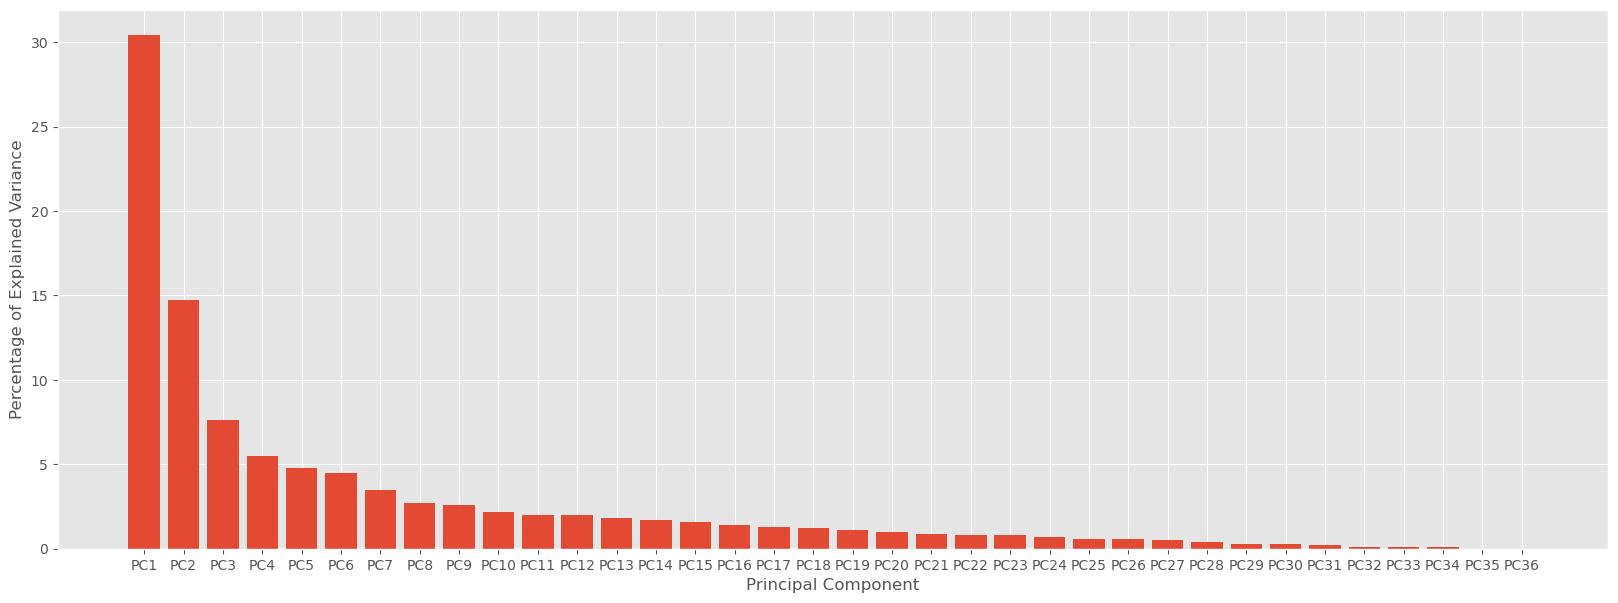

In [163]:
pca = PCA()
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
str1=()
#labels = ['PC' + str1(n) for n in range(1, len(per_var)+1)]
#labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()
pca_df = pd.DataFrame(pca_X, columns=labels)

In [164]:
per_var

array([30.4, 14.7,  7.6,  5.5,  4.8,  4.5,  3.5,  2.7,  2.6,  2.2,  2. ,
        2. ,  1.8,  1.7,  1.6,  1.4,  1.3,  1.2,  1.1,  1. ,  0.9,  0.8,
        0.8,  0.7,  0.6,  0.6,  0.5,  0.4,  0.3,  0.3,  0.2,  0.1,  0.1,
        0.1,  0. ,  0. ])

In [165]:
loading_scores = pd.Series(pca.components_[0], index = list(X))
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_features = sorted_loading_scores[0:23].index.values
print(loading_scores[sorted_features])

% Fair/Poor                     0.279731
% Children in Poverty           0.273493
% Frequent Physical Distress    0.273388
% Frequent Mental Distress      0.262906
% Free or Reduced Lunch         0.250684
% Smokers                       0.234452
Household Income               -0.222501
% Diabetic                      0.209695
Food Environment Index         -0.209313
% Excessive Drinking           -0.209172
% Insufficient Sleep            0.209066
% Physically Inactive           0.192822
% Non-Hispanic White           -0.189609
% Unemployed                    0.187174
% African American              0.183386
Income Ratio                    0.182706
% Not Proficient in English    -0.178867
% Obese                         0.170394
Chlamydia Rate                  0.162160
% Uninsured                     0.135205
% With Access                  -0.121679
Violent Crime Rate              0.117233
% Severe Housing Problems       0.107493
dtype: float64


In [166]:
str = ''.join(sorted_features)
str

'% Fair/Poor% Children in Poverty% Frequent Physical Distress% Frequent Mental Distress% Free or Reduced Lunch% SmokersHousehold Income% DiabeticFood Environment Index% Excessive Drinking% Insufficient Sleep% Physically Inactive% Non-Hispanic White% Unemployed% African AmericanIncome Ratio% Not Proficient in English% ObeseChlamydia Rate% Uninsured% With AccessViolent Crime Rate% Severe Housing Problems'

In [167]:
df4 = pd.DataFrame(df3, columns=['% Fair/Poor','% Children in Poverty','% Frequent Physical Distress','% Frequent Mental Distress','% Free or Reduced Lunch','% Smokers','Household Income','% Diabetic','Food Environment Index','% Excessive Drinking','% Insufficient Sleep','% Physically Inactive','% Non-Hispanic White','% Unemployed','% African American','Income Ratio','% Not Proficient in English','% Obese','Chlamydia Rate','% Uninsured','% With Access','Violent Crime Rate','% Severe Housing Problems','% Food Insecure'])
df4

,% Fair/Poor,% Children in Poverty,% Frequent Physical Distress,% Frequent Mental Distress,% Free or Reduced Lunch,% Smokers,Household Income,% Diabetic,Food Environment Index,% Excessive Drinking,% Insufficient Sleep,% Physically Inactive,% Non-Hispanic White,% Unemployed,% African American,Income Ratio,% Not Proficient in English,% Obese,Chlamydia Rate,% Uninsured,% With Access,Violent Crime Rate,% Severe Housing Problems,% Food Insecure
0,18.960996,19.100000,13.228410,13.376449,46.469558,18.693852,57389.333333,12.366667,7.166667,16.342010,35.968469,32.233333,50.821925,4.276360,19.214392,4.744866,25.369339,35.766667,363.133333,8.907229,69.710041,270.094073,14.887821,13.400000
1,17.836378,15.633333,12.826703,13.158445,46.495522,17.163011,56885.000000,10.900000,7.966667,17.319437,33.101956,25.166667,56.948926,4.338461,8.927992,4.505922,28.536540,30.333333,334.266667,11.444468,71.571183,208.220132,13.855400,12.200000
2,27.197267,44.633333,16.394966,15.528751,67.764101,21.999995,33252.000000,17.866667,5.566667,12.948005,38.854389,27.500000,32.258785,6.557128,47.810878,5.793803,16.047084,43.233333,610.733333,12.747597,53.388923,385.759287,14.861111,22.666667
3,19.813241,27.600000,13.208858,13.339179,62.520705,19.704733,44979.333333,14.833333,7.666667,15.856681,38.049622,35.500000,50.441667,4.990609,21.406845,4.289527,25.562522,37.866667,314.600000,10.735418,27.083788,108.449709,11.165485,15.433333
4,21.248431,18.666667,14.174388,14.286424,53.635429,19.736224,48626.000000,15.000000,8.466667,14.743531,35.981670,29.433333,61.323744,4.337052,1.454219,4.210087,30.262079,34.600000,154.233333,13.120253,23.544829,392.563537,10.516004,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,14.937694,10.666667,10.703205,11.000000,35.777860,18.024474,74483.666667,8.266667,7.766667,20.957303,31.056968,25.666667,58.361083,4.945469,1.115051,4.091974,27.804303,30.266667,220.066667,13.154998,82.895448,316.831382,9.952626,10.900000
3138,11.971453,6.900000,9.807909,10.107394,23.735664,14.182123,91116.666667,3.733333,8.233333,21.844526,26.850581,11.866667,59.359346,3.141591,0.577518,3.891758,29.701423,13.133333,379.333333,15.344839,99.906077,234.963117,16.989310,9.900000
3139,15.845821,11.700000,11.072975,11.967527,37.261519,17.737558,65172.666667,10.100000,7.433333,17.037786,31.030162,25.400000,61.412303,4.888937,0.694921,4.550020,29.899465,33.266667,250.166667,12.888246,82.672791,60.668839,11.813369,13.266667
3140,15.985324,15.033333,11.003539,11.239506,40.502884,16.286467,54237.333333,11.566667,8.300000,16.174420,28.157495,26.400000,59.683999,4.346180,0.489748,3.575821,28.269307,28.600000,214.466667,16.910093,83.727646,78.422035,10.671435,11.400000


In [177]:
df4+df20

,% 65 and over,% < 18,% African American,% American Indian/Alaskan Native,% Asian,% Children in Poverty,% Diabetic,% Excessive Drinking,% Fair/Poor,% Female,% Food Insecure,% Free or Reduced Lunch,% Frequent Mental Distress,% Frequent Physical Distress,% Hispanic,% Insufficient Sleep,% Limited Access,% Non-Hispanic White,% Not Proficient in English,% Obese,% Physically Inactive,% Rural,% Severe Housing Problems,% Smokers,% Unemployed,% Uninsured,% With Access,Association Rate,Chlamydia Rate,Drug Overdose Mortality Rate,Food Environment Index,Household Income,Income Ratio,MHP Rate,PCP Rate,Population,Violent Crime Rate
0,NaN,NaN,39.078718,NaN,NaN,35.000000,242.566667,46.942010,38.800175,NaN,29.000000,93.962410,26.076449,29.037640,NaN,74.411801,NaN,124.592710,26.172590,50.240553,536.733333,NaN,28.518787,38.504618,7.004466,18.954543,138.840165,NaN,376.386291,NaN,13.866667,115622.333333,9.835274,NaN,NaN,NaN,542.376293
1,NaN,NaN,17.535552,NaN,NaN,29.133333,180.200000,42.019437,34.297053,NaN,25.100000,86.508538,23.458445,27.582268,NaN,69.479917,NaN,140.156233,29.244998,49.070291,322.366667,NaN,26.852051,35.676329,7.064295,24.613451,145.284732,NaN,345.878308,NaN,15.766667,116756.000000,8.891057,NaN,NaN,NaN,411.880528
2,NaN,NaN,95.639607,NaN,NaN,85.633333,488.866667,40.948005,57.038767,NaN,44.566667,128.534097,33.028751,35.349660,NaN,79.743978,NaN,77.770411,17.937805,55.700307,783.300000,NaN,28.571666,47.530762,10.352372,26.251631,106.555693,NaN,628.865438,NaN,11.066667,69224.000000,11.775796,NaN,NaN,NaN,800.037148
3,NaN,NaN,42.479454,NaN,NaN,53.500000,249.833333,49.256681,43.666525,NaN,30.533333,125.623301,26.939179,30.350652,NaN,78.159680,NaN,124.849990,25.897776,53.287270,648.700000,NaN,20.420727,42.789546,8.053361,21.334468,43.335152,NaN,329.665920,NaN,15.266667,92897.333333,9.292135,NaN,NaN,NaN,197.798835
4,NaN,NaN,2.962191,NaN,NaN,39.666667,105.900000,48.043531,43.234040,NaN,24.500000,104.072396,28.886424,31.303958,NaN,74.828779,NaN,148.094400,31.880542,50.433284,332.833333,NaN,20.641668,42.691183,7.005719,27.236250,39.179315,NaN,169.045805,NaN,16.366667,101528.000000,8.637925,NaN,NaN,NaN,875.254148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,NaN,NaN,2.300607,NaN,NaN,20.766667,68.366667,45.357303,31.380928,NaN,22.600000,70.942144,19.300000,23.541374,NaN,66.494146,NaN,137.620937,28.937468,49.454668,333.466667,NaN,21.138858,36.533114,8.837544,24.615986,172.581792,NaN,231.607515,NaN,15.266667,155122.666667,8.178838,NaN,NaN,NaN,617.325528
3138,NaN,NaN,1.195486,NaN,NaN,12.600000,68.833333,32.644526,23.383171,NaN,19.400000,43.803691,12.507394,20.012832,NaN,53.918251,NaN,140.334457,33.661819,36.907193,394.366667,NaN,33.475950,27.066550,5.863902,28.711201,199.624307,NaN,388.219143,NaN,16.533333,189953.666667,7.884032,NaN,NaN,NaN,471.559026
3139,NaN,NaN,1.317881,NaN,NaN,21.300000,161.264609,42.137786,32.759191,NaN,26.766667,72.131165,22.267527,25.253111,NaN,66.900179,NaN,148.710829,30.842513,51.673974,230.300000,NaN,22.585595,38.502068,8.795966,24.726774,166.691164,NaN,262.681435,NaN,14.733333,135928.666667,8.717434,NaN,NaN,NaN,131.675357
3140,NaN,NaN,0.976616,NaN,NaN,28.933333,162.731275,44.874420,32.636125,NaN,24.000000,82.593668,21.939506,24.328211,NaN,60.544134,NaN,141.900527,28.520430,47.929130,361.200000,NaN,20.986622,35.729006,8.279192,31.744443,166.910582,NaN,226.188417,NaN,16.300000,109359.333333,7.030961,NaN,NaN,NaN,156.688140


In [168]:
import os
os.getcwd()
df4.to_csv('pca_data.csv')